In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',500)

In [2]:
df = pd.read_excel('Data_Train.xlsx')

In [3]:
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,Null,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,Null,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,Null,8625


In [4]:
df.tail(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10673,Jet Airways,27/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,13:25,04:25 28 May,15h,2 stops,Null,16704
10674,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,20:35,21:20 13 Mar,24h 45m,1 stop,In-flight meal not included,11087
10675,Air India,9/06/2019,Mumbai,Hyderabad,BOM → HYD,06:20,07:40,1h 20m,non-stop,Null,3100
10676,Multiple carriers,1/05/2019,Delhi,Cochin,DEL → BOM → COK,10:20,19:00,8h 40m,1 stop,Null,9794
10677,SpiceJet,21/05/2019,Banglore,Delhi,BLR → DEL,05:55,08:35,2h 40m,non-stop,No check-in baggage included,3257
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,Null,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,Null,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,Null,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,Null,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,Null,11753


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
df.describe(include='O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,Null
freq,3849,504,4537,4537,2376,233,423,550,5625,8347


In [8]:
df.describe(include='O').T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Date_of_Journey,10683,44,18/05/2019,504
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL → BOM → COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,Null,8347


In [9]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Airline,10683,12,Jet Airways,3849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date_of_Journey,10683,44,18/05/2019,504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,10683,5,Delhi,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,10683,6,Cochin,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Route,10682,128,DEL → BOM → COK,2376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_Time,10683,222,18:55,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_Time,10683,1343,19:00,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,10683,368,2h 50m,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Stops,10682,5,1 stop,5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Additional_Info,10683,10,Null,8347,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
# Check how many unique values in each columns we have
for i in df.columns:
    print(f'The unique values in features {i} are', df[i].unique(), sep ='\n')
    print('-'*80)

The unique values in features Airline are
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
--------------------------------------------------------------------------------
The unique values in features Date_of_Journey are
['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
--------------------------------------------------------------------

In [12]:
# Lets counts all the value  in each columns
for i in df.columns:
    print(f'The count of values in features {i} are', df[i].value_counts(), sep ='\n')
    print('-'*80)

The count of values in features Airline are
Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64
--------------------------------------------------------------------------------
The count of values in features Date_of_Journey are
Date_of_Journey
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323

In [13]:
# In destination we have 2 value for Delhi and New Delhi similarly in Airline we have 2 value for Jet Airways Business and Jet Airways

In [18]:
# I want Date of Journey in Datetime format as its in object format
# I want Total_Stops in int format as its in object format in 0 and
# Day, Weekday, Month, Year We will for more column like which date of journey, which day in the week like Sat as 6, friday as 5, month from 1 to 12, and year

In [ ]:
def preprocess(data):
    # Handling mising value  dropna delete the the row which have any zero value
    data.dropna(inplace = True)
    # Drop_duplicate delete all the if it have any duplicate value
    data.drop_duplicates(inplace = True)

    # Date time formatting  - Check the below paramter what exactly they do
    data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])
    data['day'] = pd.DatetimeIndex(data['Date_of_Journey']).day
    data['weekday'] = pd.DatetimeIndex(data['Date_of_Journey']).weekday
    data['month'] = pd.DatetimeIndex(data['Date_of_Journey']).month
    data['year'] = pd.DatetimeIndex(data['Date_of_Journey']).year

    # Cnverting non-stop object value with 0 and stop value to empty eg 2 stops i want it 2, 1 stops as 1
    data['Total_Stops'] = data['Total_Stops'].str.replace('non-stop','0')
    data['Total_Stops'] = data['Total_Stops'].str.replace('stops','')
    data['Total_Stops'] = data['Total_Stops'].str.replace('stop','')
    data['Total_Stops'] = data['Total_Stops'].astype(int)

    # Replacing common paramter with one
    data['Destination'] = np.where(data['Destination'] == 'New Delhi','Delhi',data['Destination'])
    data['Airline'] = np.where(data['Airline']=='Jet Airways Business','Jet Airways',data['Airline'])


  # Recheck the loop ?
    arrival_time = []
    for i in data['Arrival_Time']:
        arrival_time.append(i[:5]
        print("The arrival time is : ", arrival_time)

                            )
    data['Arrival_Time'] = arrival_time
    data['Arrival_Time_Hour'] = pd.DatetimeIndex(data['Arrival_Time']).hour
    data['Arrival_Time_Minute'] = pd.DatetimeIndex(data['Arrival_Time']).minute

    data['Dep_Time_Hour'] = pd.DatetimeIndex(data['Dep_Time']).hour
    data['Dep_Time_minute'] = pd.DatetimeIndex(data['Dep_Time']).minute

    data['Duration_Total_Hour'] = data['Duration'].str.replace('h','*1').str.replace(" ",'+').str.replace('m','/60').apply(eval)

    # Year column that we have create we can delete this as this for same year 2019 data, Date_of _journey we dont need bcz we have already created day, weekday and month
    data1 = pd.get_dummies(data, prefix = ['Airline','Source','Destination'],columns = ['Airline','Source','Destination'], drop_first = True)
    data1.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration','Additional_Info','year','Route'],axis = 1,inplace = True)


    return data,data1


In [ ]:
# from the above e have two value data and data1 so we are storing in showing it in data_eda and data_model
data_eda,data_model = preprocess(df)

In [ ]:
data_eda

In [ ]:
data_model

In [15]:
from pandas_profiling import ProfileReport
report = ProfileReport(data_eda)
report

AttributeError: module 'numba' has no attribute 'generated_jit'

In [ ]:
# Splitting in Dependenty and independent variable

X = data_model.drop('Price',axis = 1) # train
y = data_model['Price'] # Test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [ ]:
X_train

In [ ]:
Y_train

In [16]:
X_test

NameError: name 'X_test' is not defined

In [17]:
Y_test

NameError: name 'Y_test' is not defined

## Feature Selection

In [ ]:
# The ExtraTreesRegressor from Scikit-learn is a powerful tool for regression tasks. Let me break it down in simple terms:

# What Is It?
# Imagine you’re predicting house prices based on features like square footage, number of bedrooms, and location.
# The ExtraTreesRegressor is like a team of magical tree builders. Each builder constructs a random decision tree using different subsets of the data.
# These trees vote on the house price, and their average prediction gives a more accurate result.


# How It Works:
# The ExtraTreesRegressor:
# Creates many random decision trees (extra-trees) on different parts of the dataset.
# Averages their predictions to improve accuracy.
# Prevents overfitting (like not memorizing the training data).

# Parameters:
# n_estimators: Number of trees in the forest (default: 100).
# max_depth: Maximum depth of each tree (how many questions it can ask).
# min_samples_split: Minimum samples needed to split a node (to avoid tiny branches).
# And more!

# Real-Life Example:
# Imagine predicting car prices. Each tree looks at different features (mileage, brand, etc.).
# The ExtraTreesRegressor combines their wisdom, giving you a better estimate.


from sklearn.ensemble import ExtraTreesRegressor
extractor = ExtraTreesRegressor(random_state =42)

In [ ]:
extractor.fit(X_train,Y_train)

ExtraTreesRegressor(random_state=42)

In [ ]:
# In X xolumn checking which paramter is more important
x_columns = X_train.columns
feature_rank = pd.DataFrame({'feature':x_columns,'importance':extractor.feature_importances_})

In [ ]:
# Sortng it in ascending order

feature_rank = feature_rank.sort_values('importance',ascending = False)

<AxesSubplot:xlabel='importance', ylabel='feature'>

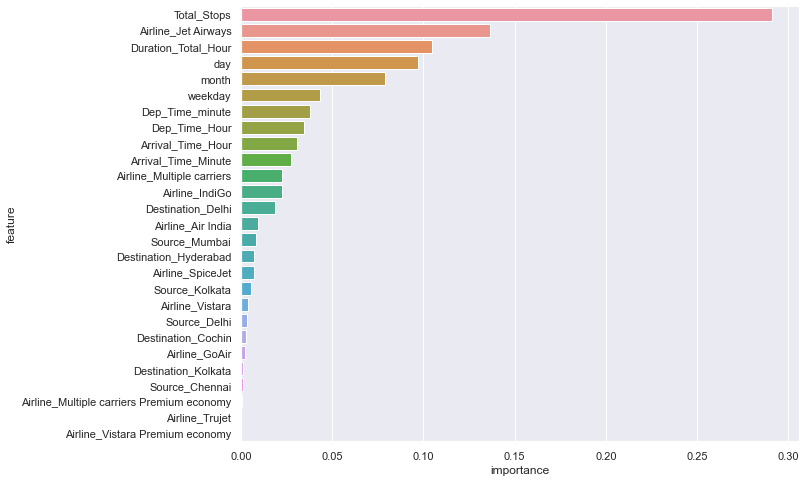

In [ ]:
plt.figure(figsize = (10,8))
sns.barplot(x = 'importance', y = 'feature', data = feature_rank)

In [ ]:
# Calcutaing the cumulative sum of importance -  2nd row is like adding cumsum value+importance 2nd row give 2nd cumsum value ans so on

feature_rank['cumsum'] = feature_rank['importance'].cumsum()*100
feature_rank.head(5)

,feature,importance,cumsum
0,Total_Stops,0.291270,29.126974
12,Airline_Jet Airways,0.136616,42.788614
8,Duration_Total_Hour,0.104795,53.268126
1,day,0.097138,62.981884
3,month,0.078886,70.870528


In [ ]:
feature_rank.head(10)

,feature,importance,cumsum
0,Total_Stops,0.291270,29.126974
12,Airline_Jet Airways,0.136616,42.788614
8,Duration_Total_Hour,0.104795,53.268126
1,day,0.097138,62.981884
3,month,0.078886,70.870528
2,weekday,0.043096,75.180081
7,Dep_Time_minute,0.038001,78.980143
6,Dep_Time_Hour,0.034456,82.425791
4,Arrival_Time_Hour,0.030973,85.523094
5,Arrival_Time_Minute,0.027354,88.258456


In [ ]:
feature_rank.head(15)

,feature,importance,cumsum
0,Total_Stops,0.291270,29.126974
12,Airline_Jet Airways,0.136616,42.788614
8,Duration_Total_Hour,0.104795,53.268126
1,day,0.097138,62.981884
3,month,0.078886,70.870528
2,weekday,0.043096,75.180081
7,Dep_Time_minute,0.038001,78.980143
6,Dep_Time_Hour,0.034456,82.425791
4,Arrival_Time_Hour,0.030973,85.523094
5,Arrival_Time_Minute,0.027354,88.258456


In [ ]:
len(x_columns)

27

## Model Building

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# from sklearn.svm import SVR, kernels = linear,poly,sigmoid and rbf ----Need to try this also
from xgboost import XGBRegressor
# Evaluation Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
def predict(ml_model):
    print('Model Name is: {}'.format(ml_model))
    ##model training
    model = ml_model.fit(X_train, Y_train)
    print('Training Score is: {}'.format(model.score(X_train,Y_train)))
    ##predictions
    predictions = model.predict(X_test)

    ##metrics
    #1-R2 score
    r2score = r2_score(Y_test,predictions)
    print('R-sqaured is: {}'.format(r2score))
    #2-Adjusted R2 score
    adj_r2 = 1-(1-r2score)*((len(X_test-1))/(len(X_test)-X_test.shape[1]-1)) # n = len of X_test, p = X_test.shape[1]
    print('Adjusted R squared is: {}'.format(adj_r2))
    #3- Error based Metrics
    print('MAE: {}'.format(mean_absolute_error(Y_test,predictions)))
    print('MSE: {}'.format(mean_squared_error(Y_test,predictions)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(Y_test,predictions))))

In [ ]:
predict(LinearRegression())

Model Name is: LinearRegression()
Training Score is: 0.5442798883475266
R-sqaured is: 0.5472331847259506
Adjusted R squared is: 0.5410939736713872
MAE: 2114.9514434467483
MSE: 9440313.233209116
RMSE: 3072.5092730875713


In [ ]:
predict(DecisionTreeRegressor())

Model Name is: DecisionTreeRegressor()
Training Score is: 0.9697961300999993
R-sqaured is: 0.6949590171115818
Adjusted R squared is: 0.6908228681910609
MAE: 1367.1118410574934
MSE: 6360188.799812205
RMSE: 2521.9414743035186


In [ ]:
predict(RandomForestRegressor())

Model Name is: RandomForestRegressor()
Training Score is: 0.9485803081949686
R-sqaured is: 0.805172427604398
Adjusted R squared is: 0.8025306978092034
MAE: 1195.8771760114653
MSE: 4062208.7304851688
RMSE: 2015.4921807055389


In [ ]:
predict(XGBRegressor())

Model Name is: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
Training Score is: 0.9411786625771221
R-sqaured is: 0.817113261569302
Adjusted R squared is: 0.8146334413871908
MAE: 1189.7548224480597
MSE: 3813239.042134211
RMSE: 1952.7516591042013


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators':[100,120,150,200,250,300],'max_features':['auto','sqrt'],'max_depth':[5,10,15,20]}
rf = RandomForestRegressor()
rf_cv = RandomizedSearchCV(rf,params,cv= 10, scoring= 'r2', verbose = True,n_jobs =-1)
rf_cv.fit(X_train,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [100, 120, 150, 200,
                                                         250, 300]},
                   scoring='r2', verbose=True)

In [ ]:
rf_cv.best_params_

{'n_estimators': 250, 'max_features': 'sqrt', 'max_depth': 15}

In [ ]:
predict(RandomForestRegressor(n_estimators = 250, max_features = 'sqrt', max_depth =15))

Model Name is: RandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=250)
Training Score is: 0.9241112713593583
R-sqaured is: 0.820833264784898
Adjusted R squared is: 0.8184038853243543
MAE: 1243.3026356418243
MSE: 3735675.9469623263
RMSE: 1932.789679960633
